In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dark_background")

In [3]:
oliv = datasets.fetch_olivetti_faces()

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [6]:
oliv['images'].shape

(400, 64, 64)

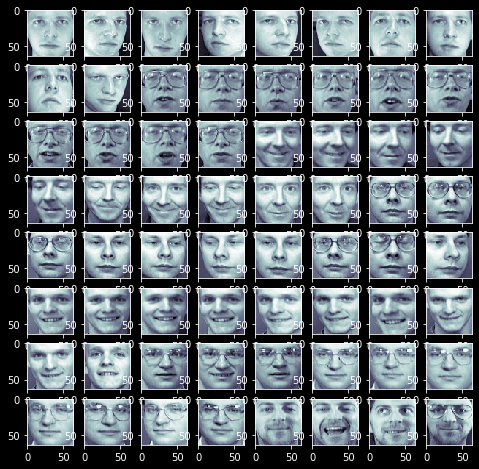

In [8]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [43]:
x = oliv.data
y = oliv.target

In [29]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total<0.95:
    current_sum += pca.explained_variance_[k]
    k += 1
k

123

In [31]:
pca = PCA(n_components=k)
transformed_data = pca.fit_transform(x)

transformed_data.shape

(400, 123)

In [32]:
x_approx = pca.inverse_transform(transformed_data)

x_approx.shape

(400, 4096)

In [33]:
x_approx_images = x_approx.reshape((400, 64, 64))

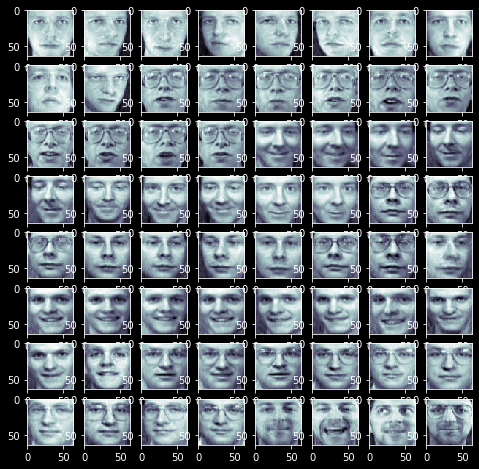

In [35]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [36]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [38]:
eigen_faces = eigenv.reshape((123, 64, 64))

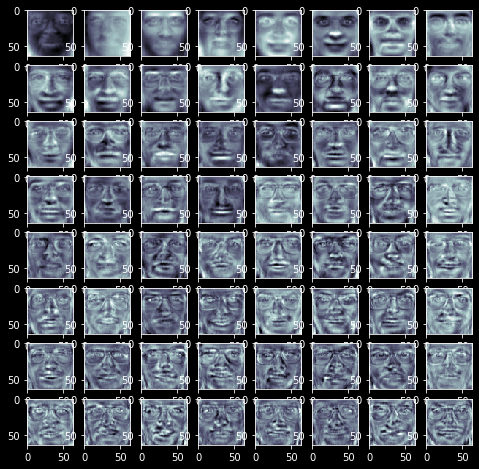

In [39]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap=plt.cm.bone)
plt.show()